In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import glob, os, sys
from pathlib import Path
#import seaborn as sns
import matplotlib._color_data as mcd
import pyarrow.parquet as pq
import click

import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.backends.backend_pdf import PdfPages

import pyarrow.parquet
import pyarrow as pa
import pandas as pd
import Outcomes


import multiprocessing
import pathlib
import time

import click

from SEIR import  NPI, setup, file_paths
from SEIR.utils import config
from SEIR.profile import profile_options
from Outcomes import outcomes

os.chdir('COVIDScenarioPipeline/Outcomes/test/')

config_path = 'config_npi.yml'

config.set_file(config_path)
geoid = ['15005', '15007', '15009', '15001', '15003']

In [2]:
seir = pq.read_table("model_output/seir/000000001.105.seir.parquet").to_pandas()
seir

,comp,15005,15007,15009,15001,15003,time,p_comp
0,S,0,0,0,0,0,2020-04-01,0
1,E,0,0,0,0,0,2020-04-01,0
2,I1,0,0,0,0,0,2020-04-01,0
3,I2,0,0,0,0,0,2020-04-01,0
4,I3,0,0,0,0,0,2020-04-01,0
...,...,...,...,...,...,...,...,...
355,I2,0,0,0,0,0,2020-05-15,0
356,I3,0,0,0,0,0,2020-05-15,0
357,R,0,0,0,0,0,2020-05-15,0
358,cumI,0,0,0,0,0,2020-05-15,0


In [46]:
hosp = pq.read_table('model_output/hosp/000000001.111.hosp.parquet').to_pandas()
hosp

,time,p_comp,geoid,incidI,incidH,hosp_curr,incidD,incidICU
0,2020-04-01,0.0,15005,0,0.0,0.0,0.0,0.0
1,2020-04-02,0.0,15005,0,0.0,0.0,0.0,0.0
2,2020-04-03,0.0,15005,0,0.0,0.0,0.0,0.0
3,2020-04-04,0.0,15005,0,0.0,0.0,0.0,0.0
4,2020-04-05,0.0,15005,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
445,2020-05-11,1.0,15003,0,0.0,0.0,0.0,0.0
446,2020-05-12,1.0,15003,0,0.0,0.0,0.0,0.0
447,2020-05-13,1.0,15003,0,0.0,0.0,0.0,0.0
448,2020-05-14,1.0,15003,0,0.0,0.0,0.0,0.0


In [42]:
t

,geoid,p_comp,quantity,outcome,source,value
0,15005,0.0,probability,incidH,incidI,0.2
1,15007,0.0,probability,incidH,incidI,0.2
2,15009,0.0,probability,incidH,incidI,0.2
3,15001,0.0,probability,incidH,incidI,0.2
4,15003,0.0,probability,incidH,incidI,0.2
...,...,...,...,...,...,...
65,15005,1.0,delay,incidICU,incidH,0.0
66,15007,1.0,delay,incidICU,incidH,0.0
67,15009,1.0,delay,incidICU,incidH,0.0
68,15001,1.0,delay,incidICU,incidH,0.0


In [34]:
new_seir = pd.concat([seir, seir2])
new_seir[new_seir['p_comp']==1]

,comp,15005,15007,15009,15001,15003,time,p_comp
0,S,0,0,0,0,0,2020-04-01,1.0
1,E,0,0,0,0,0,2020-04-01,1.0
2,I1,0,0,0,0,0,2020-04-01,1.0
3,I2,0,0,0,0,0,2020-04-01,1.0
4,I3,0,0,0,0,0,2020-04-01,1.0
...,...,...,...,...,...,...,...,...
355,I2,0,0,0,0,0,2020-05-15,1.0
356,I3,0,0,0,0,0,2020-05-15,1.0
357,R,0,0,0,0,0,2020-05-15,1.0
358,cumI,0,0,0,0,0,2020-05-15,1.0


<AxesSubplot:xlabel='time'>

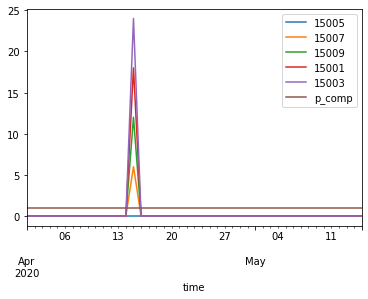

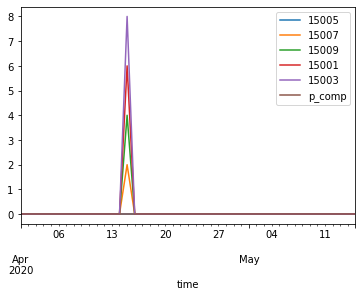

In [37]:
new_seir[(new_seir['comp'] == 'diffI') & (new_seir['p_comp'] == 1)].set_index('time', drop=True).plot()
new_seir[(new_seir['comp'] == 'diffI') & (new_seir['p_comp'] == 0)].set_index('time', drop=True).plot()

In [13]:
hnpi = pq.read_table("model_output/hnpi/000000001.1.hnpi.parquet").to_pandas()
hnpi

,geoid,npi_name,start_date,end_date,parameter,reduction


In [14]:
hnpi_read = pq.read_table('model_output/hnpi/000000001.105.hnpi.parquet').to_pandas()
hnpi_read

,geoid,npi_name,start_date,end_date,parameter,reduction
0,15005,Hdelay,2020-04-01,2020-05-15,incidh::delay,0.384002
1,15007,Hdelay,2020-04-01,2020-05-15,incidh::delay,0.098211
2,15009,Hdelay,2020-04-01,2020-05-15,incidh::delay,-0.867075
3,15001,Hdelay,2020-04-01,2020-05-15,incidh::delay,-0.126350
4,15003,Hdelay,2020-04-01,2020-05-15,incidh::delay,0.445322
5,15005,Hprobability,2020-04-01,2020-05-15,incidh::probability,0.288977
6,15007,Hprobability,2020-04-01,2020-05-15,incidh::probability,-0.655633
7,15009,Hprobability,2020-04-01,2020-05-15,incidh::probability,0.241634
8,15001,Hprobability,2020-04-01,2020-05-15,incidh::probability,-0.157087
9,15003,Hprobability,2020-04-01,2020-05-15,incidh::probability,0.575923


In [13]:
hnpi_wrote = pq.read_table('model_output/hnpi/000000001.106.hnpi.parquet').to_pandas()
hnpi_wrote

,geoid,npi_name,start_date,end_date,parameter,reduction
0,15005,Hdelay,2020-04-01,2020-05-15,incidh::delay,0.384002
1,15007,Hdelay,2020-04-01,2020-05-15,incidh::delay,0.098211
2,15009,Hdelay,2020-04-01,2020-05-15,incidh::delay,-0.867075
3,15001,Hdelay,2020-04-01,2020-05-15,incidh::delay,-0.126350
4,15003,Hdelay,2020-04-01,2020-05-15,incidh::delay,0.445322
5,15005,Hprobability,2020-04-01,2020-05-15,incidh::probability,0.288977
6,15007,Hprobability,2020-04-01,2020-05-15,incidh::probability,-0.655633
7,15009,Hprobability,2020-04-01,2020-05-15,incidh::probability,0.241634
8,15001,Hprobability,2020-04-01,2020-05-15,incidh::probability,-0.157087
9,15003,Hprobability,2020-04-01,2020-05-15,incidh::probability,0.575923


In [34]:
    hpar_read = pq.read_table('model_output/hpar/000000001.105.hpar.parquet').to_pandas()
    hpar_wrote = pq.read_table('model_output/hpar/000000001.106.hpar.parquet').to_pandas()
    assert((hpar_read == hpar_wrote).all().all())

In [7]:
hosp_read = pq.read_table('model_output/hosp/000000001.12.hosp.parquet').to_pandas()
hosp_wrote = pq.read_table('model_output/hosp/000000001.13.hosp.parquet').to_pandas()
assert((hosp_read == hosp_wrote).all().all())
    

In [10]:
    hosp_read = pq.read_table('model_output/hosp/000000001.105.hosp.parquet').to_pandas()
    hosp_wrote = pq.read_table('model_output/hosp/000000001.106.hosp.parquet').to_pandas()
    

In [11]:
hosp_read.set_index('time', drop=True, inplace=True)
hosp_wrote.set_index('time', drop=True, inplace=True)

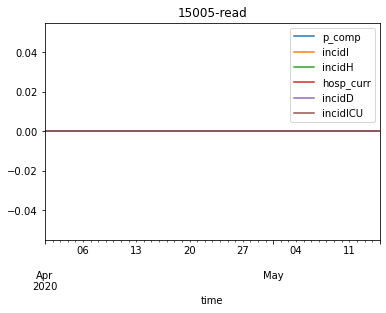

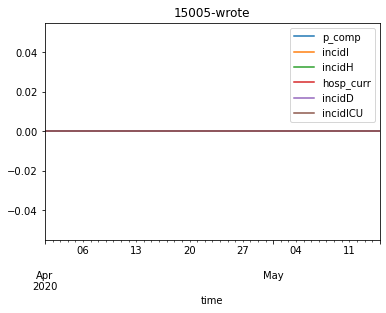

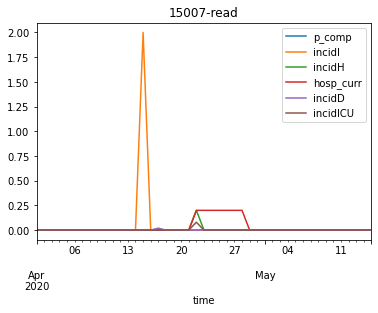

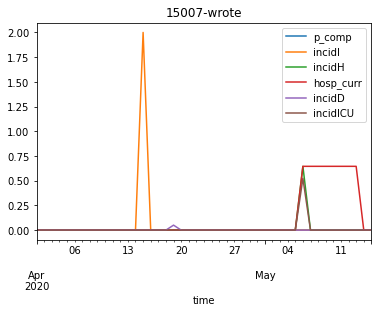

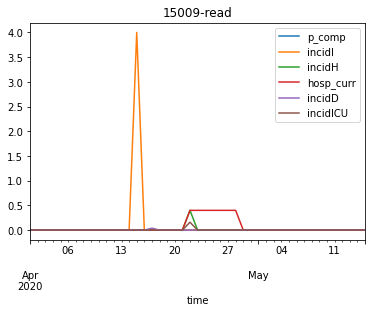

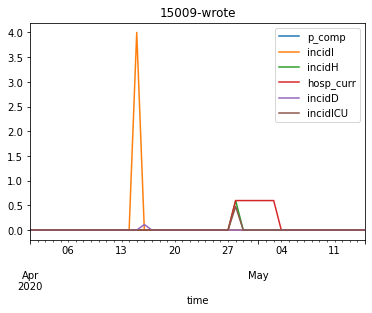

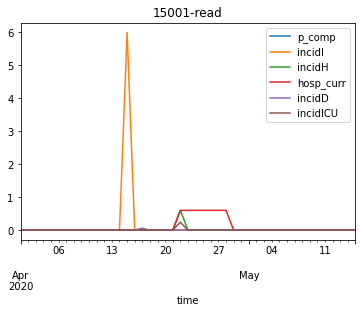

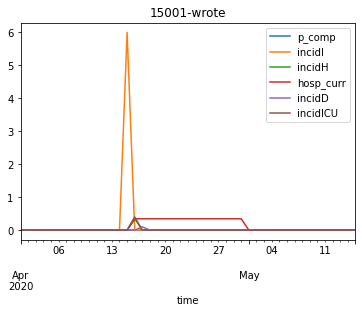

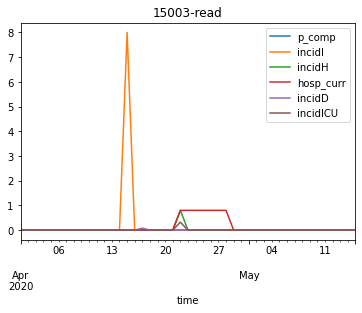

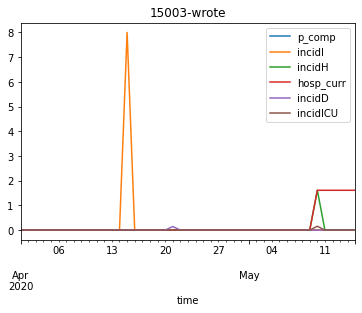

In [12]:
for pl in geoid:
    hosp_read[hosp_read['geoid'] == pl].plot(title = f"{pl}-read")
    hosp_wrote[hosp_wrote['geoid'] == pl].plot(title = f"{pl}-wrote")

<AxesSubplot:xlabel='time'>

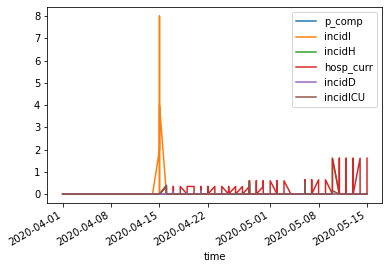

In [45]:
hosp_wrote.set_index('time', drop=True).plot()

In [3]:

spatial_config = config["spatial_setup"]
spatial_base_path = pathlib.Path(spatial_config["base_path"].get())
scenario = 'Scenario1'
deathrate = 'high_death_rate'
stoch_traj_flag= True # Truthy: stochastic simulation, Falsy: determnistic mean of the binomial draws
nsim = 10
interactive = False
write_csv = False
write_parquet = True

index = 1
run_id = 'test_inference'
prefix='test_inference/Scenario1/high_death_rate/test_inference/global/intermediate/000000001.'
s = setup.Setup(
    setup_name=config["name"].get() + "_" + str(scenario),
    spatial_setup=setup.SpatialSetup(
        setup_name=spatial_config["setup_name"].get(),
        geodata_file=spatial_base_path / spatial_config["geodata"].get(),
        mobility_file=spatial_base_path / spatial_config["mobility"].get(),
        popnodes_key=spatial_config["popnodes"].get(),
        nodenames_key=spatial_config["nodenames"].get()
    ),
    nsim=nsim,
    npi_scenario=scenario,
    npi_config=config["interventions"]["settings"][scenario],
    seeding_config=config["seeding"],
    ti=config["start_date"].as_date(),
    tf=config["end_date"].as_date(),
    interactive=interactive,
    write_csv=write_csv,
    write_parquet=write_parquet,
    dt=config["dt"].as_number(),
    first_sim_index = index,
    in_run_id = run_id,
    in_prefix = prefix,
    out_run_id = run_id,
    out_prefix = prefix
)

print(f"""
>> Running ***{'STOCHASTIC' if stoch_traj_flag else 'DETERMINISTIC'}*** SEIR and Outcomes modules
>> Scenario: {scenario}
>> Starting {s.nsim} model runs beginning from {s.first_sim_index}
>> Setup *** {s.setup_name} *** from {s.ti} to {s.tf}
>> writing to folder : {s.datadir}{s.setup_name}
    """)
setup_name = s.setup_name


onerun_OUTCOMES_loadID = lambda index: outcomes.onerun_delayframe_outcomes_load_hpar(config,
                                                                                     run_id, prefix, int(index), # input
                                                                                     run_id, prefix, int(index), # output
                                                                                     deathrate, stoch_traj_flag)
onerun_OUTCOMES = lambda index: outcomes.run_delayframe_outcomes(config,
                                                                 run_id, prefix, int(index), # input
                                                                 run_id, prefix, int(index), # output
                                                                 deathrate, nsim=1, n_jobs=1, stoch_traj_flag = stoch_traj_flag)
onerun_SEIR_loadID = lambda sim_id2write, s, sim_id2load: seir.onerun_SEIR_loadID(int(sim_id2write), s, int(sim_id2load), stoch_traj_flag)
onerun_SEIR = lambda sim_id2write, s: seir.onerun_SEIR(int(sim_id2write), s, stoch_traj_flag)

onerun_OUTCOMES(0)
#onerun_OUTCOMES_loadID(0)


>> Running ***STOCHASTIC*** SEIR and Outcomes modules
>> Scenario: Scenario1
>> Starting 10 model runs beginning from 1
>> Setup *** test_inference_Scenario1 *** from 2020-04-01 to 2020-05-15
>> writing to folder : model_output/seir/test_inference/Scenario1/high_death_rate/test_inference/global/intermediatetest_inference_Scenario1
    
Loaded geoids in loaded relative probablity file: 3226 Intersect with seir simulation:  5 keeped
Using 'param_from_file' for relative probability incidI -->  incidH
Using 'param_from_file' for relative probability incidI -->  incidD
Using 'param_from_file' for relative probability incidH -->  incidICU

>> 1 outcomes simulations completed in 0.2 seconds



1

In [4]:
snpi_fn = 'model_output/snpi/test_inference/Scenario1/high_death_rate/test_inference/global/intermediate/000000001.000000001.000000001.test_inference.snpi.parquet'

snpi = pq.read_table(snpi_fn).to_pandas()
npi = NPI.NPIBase.execute(
    npi_config=s.npi_config,
    global_config=config,
    geoids=s.spatset.nodenames,
    loaded_df = snpi)
p_draw = setup.parameters_load(snpi_fn.replace('snpi', 'spar')[:-8],
    'parquet',
    len(s.t_inter),
    s.nnodes
)

#npi = NPI.NPIBase.execute(
#    npi_config=s.npi_config,
#    global_config=config,
#    geoids=s.spatset.nodenames,
#    loaded_df = snpi)

parameters = setup.parameters_reduce(p_draw, npi, s.dt)
beta = parameters[1]

In [5]:
a = snpi[snpi['parameter']=='r0'].parameter.unique()

In [13]:
a = ['sds', 'df'] 

In [15]:
joined_list = [*a, *'r0']
joined_list

['sds', 'df', 'r', '0']

In [17]:
hpar_read = pq.read_table('model_output/hnpi/000000001.105.hnpi.parquet').to_pandas()
hpar_wrote = pq.read_table('model_output/hnpi/000000001.106.hnpi.parquet').to_pandas()
assert((hpar_read == hpar_wrote).all().all())

AssertionError: 

In [18]:
hpar_read

,geoid,npi_name,start_date,end_date,parameter,reduction
0,15005,Hdelay,2020-04-01,2020-05-15,incidh::delay,-0.751609
1,15007,Hdelay,2020-04-01,2020-05-15,incidh::delay,-0.440194
2,15009,Hdelay,2020-04-01,2020-05-15,incidh::delay,0.289500
3,15001,Hdelay,2020-04-01,2020-05-15,incidh::delay,-0.689498
4,15003,Hdelay,2020-04-01,2020-05-15,incidh::delay,0.829949
5,15005,Hprobability,2020-04-01,2020-05-15,incidh::probability,0.422100
6,15007,Hprobability,2020-04-01,2020-05-15,incidh::probability,0.864434
7,15009,Hprobability,2020-04-01,2020-05-15,incidh::probability,0.394174
8,15001,Hprobability,2020-04-01,2020-05-15,incidh::probability,0.305375
9,15003,Hprobability,2020-04-01,2020-05-15,incidh::probability,-0.159133


In [19]:
'dsfdsfDdf'.lower()

'dsfdsfddf'

In [26]:
'Hdelay' in hpar_wrote['npi_name']

True